Importamos las librerias necesarias y leemos el archivo.

In [328]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [329]:
# Accesos por tecnologia
axt = pd.read_csv('../data/crudo/acc_x_tecnologia.csv')

## Análisis del Crecimiento Total de Conectividades por Año

Este análisis comienza con el objetivo de entender cómo ha evolucionado el número de conexiones de internet en Argentina, abarcando tecnologías como ADSL, Cablemódem, Fibra Óptica, Wireless, y otras. El enfoque principal está en el crecimiento real de usuarios año tras año, lo que nos permite observar tendencias sin ser afectados por distorsiones en los ingresos provocadas por la alta inflación en Argentina.

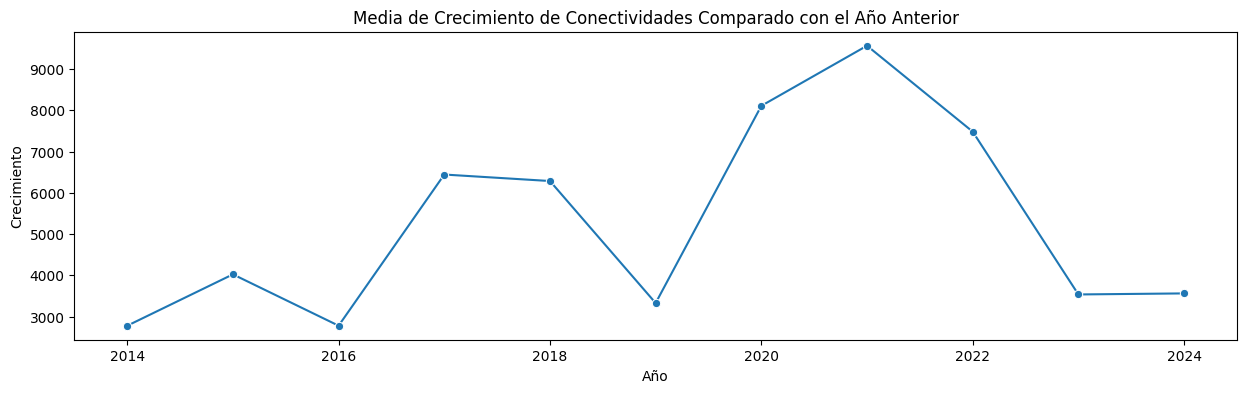

In [330]:
# Agrupar por provincia y año y calcular la suma total de conexiones
total_x_prov = axt.groupby(['Provincia', 'Año', 'Trimestre']).agg({'Total': 'sum'}).reset_index()
# Calcular el crecimiento de conexiones por provincia
total_x_prov['Crecimiento'] = total_x_prov.groupby('Provincia')['Total'].diff()

fig, ax = plt.subplots(figsize=(15,4))

sns.lineplot(data=total_x_prov, x='Año', y='Crecimiento', marker='o', errorbar=None)
ax.set_title('Media de Crecimiento de Conectividades Comparado con el Año Anterior', fontsize=12)

plt.show()

## Conclusiones del Análisis de Crecimiento de Conexiones (2014-2024)

- **Tendencia Cíclica:** El crecimiento de conexiones muestra un patrón cíclico, con aumentos sostenidos durante dos años seguidos seguidos de descensos recurrentes. Basando en la tendencia actual, 2024 podria ser un año positivo para el crecimiento.

- **Relación con COVID-19:** Se observa un notable aumento en 2020-2021, probablemente impulsado por la pandemia y el incremento en la demanda de conectividad debido al trabajo remoto y la educación a distancia.

- **Situación Actual:** El crecimiento de conectividad en 2024 se mantiene al nivel de 2015, sugiriendo una estabilización en comparación con los picos anteriores.

**Nota:** Este análisis refleja la media del crecimiento de conexiones y puede estar influenciado por eventos específicos en distintas provincias.

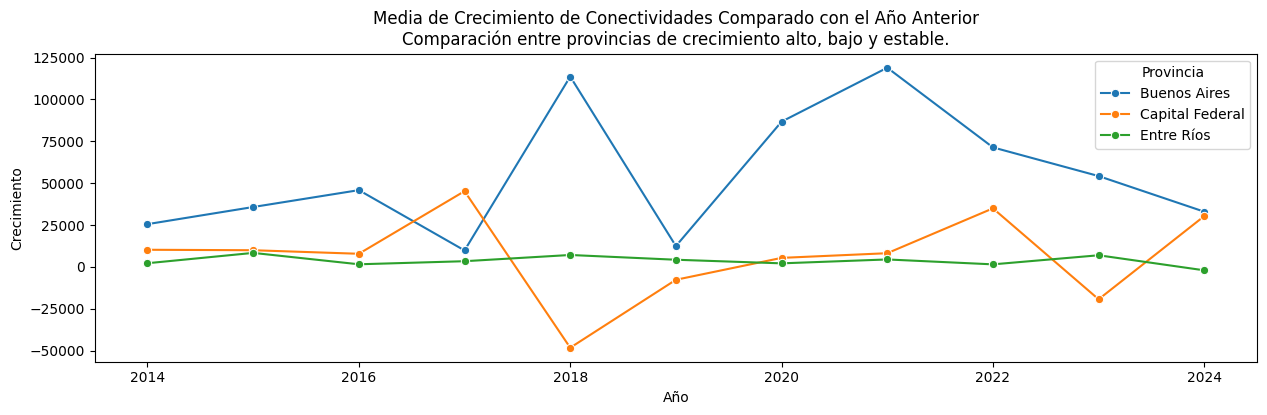

In [331]:
# Filtrar los datos para solo incluir outliers. Pude encontrar estos datos con un (hue='Provincia') en el grafico anterior.
total_x_prov_filtrado = total_x_prov[total_x_prov['Provincia'].isin(['Buenos Aires', 'Entre Ríos','Capital Federal'])]

fig, ax = plt.subplots(figsize=(15,4))

sns.lineplot(data=total_x_prov_filtrado, x='Año', y='Crecimiento', marker='o', hue='Provincia', errorbar=None)
ax.set_title('Media de Crecimiento de Conectividades Comparado con el Año Anterior\nComparación entre provincias de crecimiento alto, bajo y estable.', fontsize=12)

plt.show()

### Conclusiones del Análisis de Crecimiento de Conexiones por provincias. (2014-2024)

- **Buenos Aires como Oportunidad de Crecimiento:** La provincia de Buenos Aires ha liderado el crecimiento de conectividad en el país, con picos significativos en 2018 y durante la pandemia, destacándose como un centro clave para la expansión del acceso a internet. Actualmente, el crecimiento se encuentra a niveles similares a los de 2016 y sigue a una caída de tres años consecutivos, situándose en la misma posición que Capital Federal. Esta estabilización sugiere una oportunidad para reactivar el crecimiento, proximamente veremos en que tecnologias de conectividad.


- **Correlación Inversa con Capital Federal:** A diferencia de Buenos Aires, Capital Federal muestra una correlación inversa en el crecimiento de conectividad. Mientras Buenos Aires crece, Capital Federal experimenta descensos marcados, sugiriendo que cuando una aumenta su conectividad, la otra tiende a disminuir.

- **Estabilidad en Entre Ríos:** Entre Ríos muestra un comportamiento estable en el tiempo, sin variaciones notables, lo que indica un mercado maduro sin grandes fluctuaciones en su conectividad.

### Veamos cuales son las tecnologias que destacan en estas provincias.

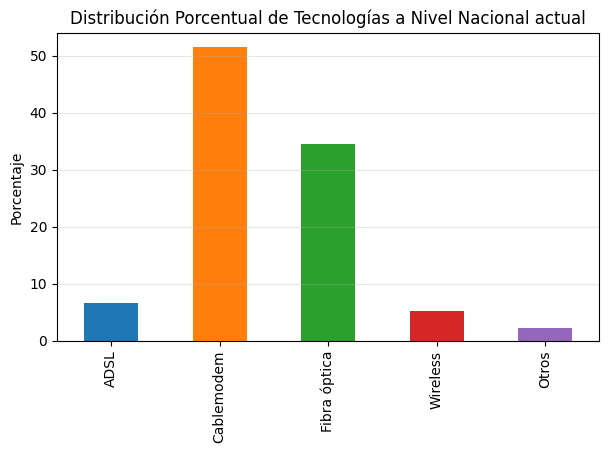

In [332]:
# Calcular los porcentajes de cada tecnología respecto al Total
actual = axt[axt['Año'] == 2024]

total_nacional = actual[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
total_general = actual['Total'].sum()
total_nacional_percent = (total_nacional / total_general) * 100

# Crear gráfico de barras con tecnologias sobre el total.
fig, ax = plt.subplots(figsize=(7, 4))

total_nacional_percent.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax.set_title('Distribución Porcentual de Tecnologías a Nivel Nacional actual', fontsize=12)
ax.set_ylabel('Porcentaje')

plt.grid(axis='y', alpha=0.3)
plt.show()

### Conclusiones de la Distribución Tecnológica en la actualidad.

- **Predominio del Cablemodem y Fibra Óptica:** La conectividad en Argentina está altamente concentrada en dos tecnologías: **Cablemodem** >(50%) y **Fibra Óptica** (33%). Este dominio sugiere que cualquier inversión o estrategia de expansión debe priorizar estas tecnologías, ya que representan la mayor demanda actual y probablemente las mejores oportunidades para aumentar la cobertura y calidad del servicio.

- **Wireless y Otros:** Aunque **Wireless** y **Otros** suman apenas un **8%** combinado, este segmento puede ofrecer nichos estratégicos, especialmente en zonas rurales o de difícil acceso, donde las infraestructuras tradicionales como el Cablemodem o la Fibra Óptica son menos viables.


**Recomendación Gerencial:**  
La tendencia clara es que el futuro de la conectividad en Argentina está en la expansión de la **Fibra Óptica** y el fortalecimiento de la red de **Cablemodem**. Se debe minimizar la inversión en **ADSL** y buscar oportunidades en **Wireless** para regiones menos accesibles. Las empresas deben enfocar su infraestructura y políticas comerciales en alinearse con esta evolución tecnológica.

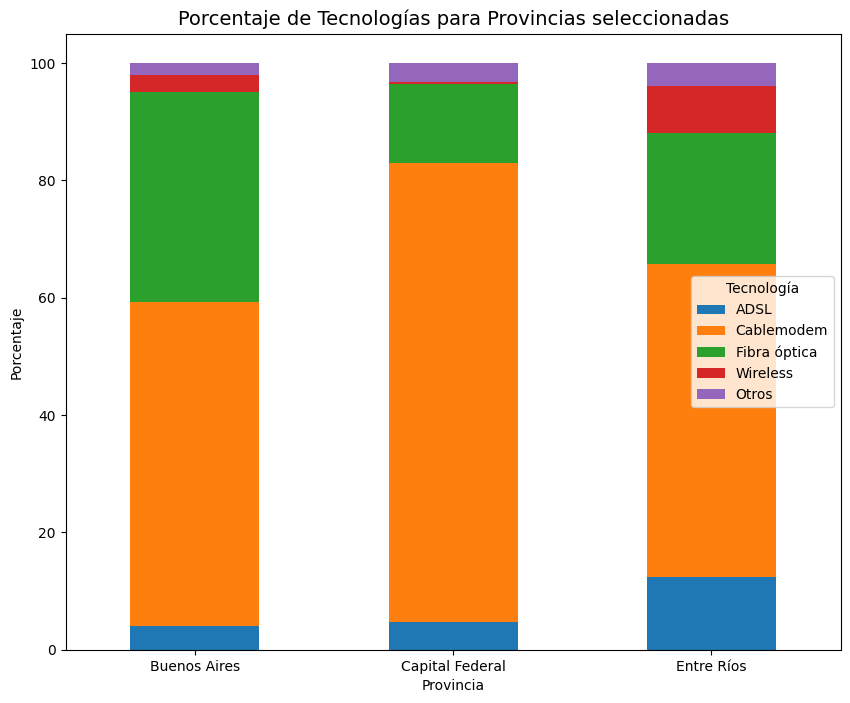

In [333]:
# Mantener la columna 'Provincia' en el DataFrame antes de calcular los porcentajes
df_percent = actual[['Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].copy()
# Calcular los porcentajes de cada tecnología respecto al Total
df_percent[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']] = df_percent[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].div(actual['Total'], axis=0) * 100
provincias_interes = ['Buenos Aires', 'Capital Federal', 'Entre Ríos']
df_filtrado = df_percent[df_percent['Provincia'].isin(provincias_interes)]
# Establecer 'Provincia' como índice para que se muestre en el eje x
df_filtrado.set_index('Provincia', inplace=True)


# Crear gráfico de barras apiladas con tecnologias sobre el total de las provincias seleccionadas.
fig, ax = plt.subplots(figsize=(10,8))

df_filtrado.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Tecnologías para Provincias seleccionadas', fontsize=14)
ax.set_ylabel('Porcentaje')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.legend(title='Tecnología')

plt.show() 

### Conclusiones del Análisis de Tecnologías en la actualidad.

- **Buenos Aires:** La alta proporción de **Cablemodem** destaca una infraestructura estable pero que podría beneficiarse de una modernización en la expansión de **Fibra óptica** y **Wireless**. La actualización hacia tecnologías más modernas no solo optimizará la red, sino que también podría atraer nuevos negocios y fomentar el desarrollo en áreas rurales.

- **Capital Federal:** Aunque **Cablemodem** y **ADSL** siguen siendo predominantes, hay una necesidad de incrementar la **Fibra óptica**. La modernización de la infraestructura con estas tecnologías avanzadas permitirá a Capital Federal mantener su liderazgo en conectividad, mejorar la experiencia del usuario y sostener el ritmo con las tendencias globales de tecnología. Un incremento estratégico en **Fibra óptica** y **Wireless** también ayudará a abordar las crecientes expectativas de una población altamente urbana y tecnológica.

- **Entre Ríos:** La dependencia de **ADSL** y **Cablemodem** revela la necesidad de actualización tecnológica para mantenerse al día con las tendencias del mercado. Invertir en **Fibra óptica** es esencial para mejorar la capacidad y la calidad de la conectividad en la provincia, promoviendo un crecimiento económico sostenido. Además, expandir la cobertura de **Wireless** en áreas rurales puede cerrar la brecha en conectividad y fomentar un desarrollo más equitativo en la región.


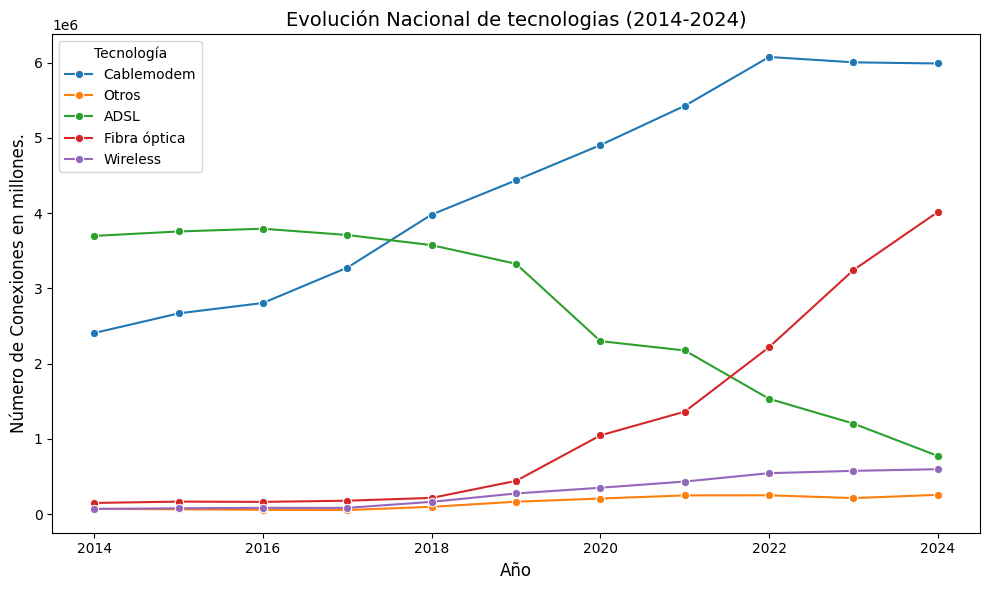

In [334]:
# Agrupar los datos por Año, Trimestre y sumar los valores de Cablemodem y Fibra óptica a nivel nacional
primer = axt[axt['Trimestre'] == 1]
df_nacional = primer.groupby(['Año'])[['Cablemodem', 'Fibra óptica','Otros','Wireless', 'ADSL']].sum().reset_index()


# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_nacional, x='Año', y='Cablemodem', marker='o', label='Cablemodem', ax=ax)
sns.lineplot(data=df_nacional, x='Año', y='Otros', marker='o', label='Otros', ax=ax)
sns.lineplot(data=df_nacional, x='Año', y='ADSL', marker='o', label='ADSL', ax=ax)
sns.lineplot(data=df_nacional, x='Año', y='Fibra óptica', marker='o', label='Fibra óptica', ax=ax)
sns.lineplot(data=df_nacional, x='Año', y='Wireless', marker='o', label='Wireless', ax=ax)


# Configurar el gráfico
ax.set_title('Evolución Nacional de tecnologias (2014-2024)', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Número de Conexiones en millones.', fontsize=12)
ax.legend(title='Tecnología')

plt.tight_layout()
plt.show()

### Conclusiones sobre la Evolución de Tecnologías

- **Cablemodem en Punto de Saturación:** Aunque **Cablemodem** ha liderado el crecimiento desde 2017, su estabilización desde 2022 sugiere un posible punto de saturación en el mercado. Esta tecnología podría estar llegando a su límite de adopción, lo que indica que futuras inversiones en su expansión podrían no generar el mismo retorno que en años anteriores.

- **Fibra Óptica en Crecimiento Acelerado:** Desde 2018, la **Fibra óptica** ha mostrado un crecimiento sostenido, y en 2022 superó a **ADSL**, colocándose como una tecnología clave para el futuro. Su tendencia ascendente la posiciona como una opción viable para sustituir otras tecnologías en declive, ofreciendo mayor capacidad y velocidad, lo que será esencial para satisfacer la creciente demanda de conectividad de alta calidad.

- **ADSL en Declive Rápido:** El marcado descenso de **ADSL** refleja su obsolescencia, alcanzando niveles cercanos a los de **Wireless**. Este declive es un indicio claro de que los usuarios están migrando hacia tecnologías más rápidas y eficientes. 

- **Oportunidad para Invertir en Fibra Óptica:** La proyección de que **Fibra óptica** podría alcanzar o incluso superar a **Cablemodem** en los próximos años abre una clara oportunidad de inversión. Potenciar esta tecnología permitirá a las empresas anticiparse a la evolución del mercado y mantenerse competitivas en un entorno de demanda creciente por servicios de alta velocidad.


Veamos donde se encuentran las ciudades con mayor uso de conexiones Dial-up. Para oportunidades de reemplazo

In [335]:
dial = pd.read_csv('../data/crudo/dial_baf.csv')
dial_total = pd.read_csv('../data/crudo/dial_total.csv')

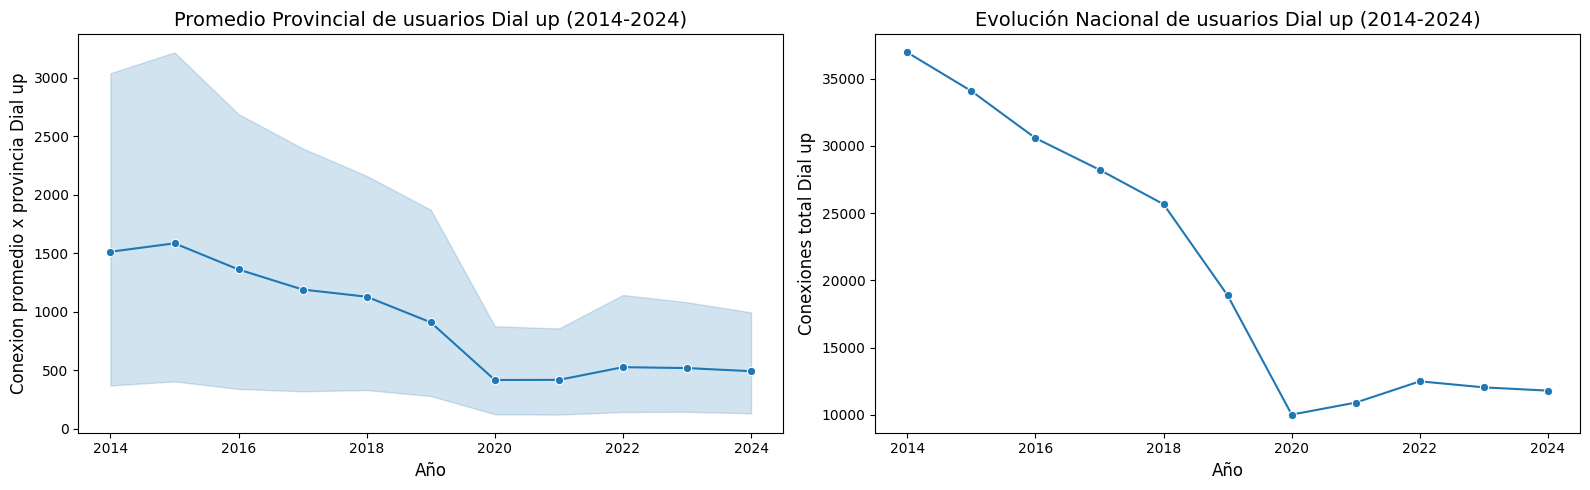

In [336]:
# Crear el gráfico de líneas
fig, ax = plt.subplots(1,2,figsize=(16, 5))

sns.lineplot(data=dial, x='Año', y='Dial up', marker='o', ax=ax[0])
# Configurar el gráfico
ax[0].set_title('Promedio Provincial de usuarios Dial up (2014-2024)', fontsize=14)
ax[0].set_xlabel('Año', fontsize=12)
ax[0].set_ylabel('Conexion promedio x provincia Dial up', fontsize=12)

sns.lineplot(data=dial_total, x='Año', y='Dial up', marker='o', ax=ax[1], errorbar=None)
# Configurar el gráfico
ax[1].set_title('Evolución Nacional de usuarios Dial up (2014-2024)', fontsize=14)
ax[1].set_xlabel('Año', fontsize=12)
ax[1].set_ylabel('Conexiones total Dial up', fontsize=12)

plt.tight_layout()
plt.show()

### Conclusiones de Accesos Dial up.

- **Declive Sostenido y Resistencia del Dial-Up**: A pesar de la disminución significativa en los accesos **Dial-Up** desde 2014, el reciente repunte leve y la estabilización alrededor de los 12.000 usuarios desde 2020 sugieren una demanda residual, posiblemente en áreas rurales o lugares con infraestructura limitada. Aunque el uso de esta tecnología parece estar en fase terminal, es importante no ignorar a este segmento residual que sigue dependiendo de Dial-Up. 

- **Oportunidad para Migración Tecnológica**: El declive y posterior estabilización en el número de usuarios refleja una ventana de oportunidad para acelerar la transición a tecnologías más modernas como **Banda Ancha Fija** o **Banda Ancha Móvil**. Una estrategia enfocada en migrar estos usuarios a infraestructuras más robustas, como **fibra óptica** o **wireless**, podría optimizar la conectividad y abrir nuevas oportunidades de desarrollo, especialmente en zonas menos conectadas.

- **Crecimiento Estancado, pero Resiliente**: Aunque Dial-Up no muestra un crecimiento significativo, la estabilización observada después de la pandemia señala que la demanda de conectividad persiste, aunque de forma marginal. Este dato puede ser relevante para identificar brechas de infraestructura en localidades donde todavía no se ha podido sustituir adecuadamente el Dial-Up, sugiriendo la necesidad de inversión en estas áreas.


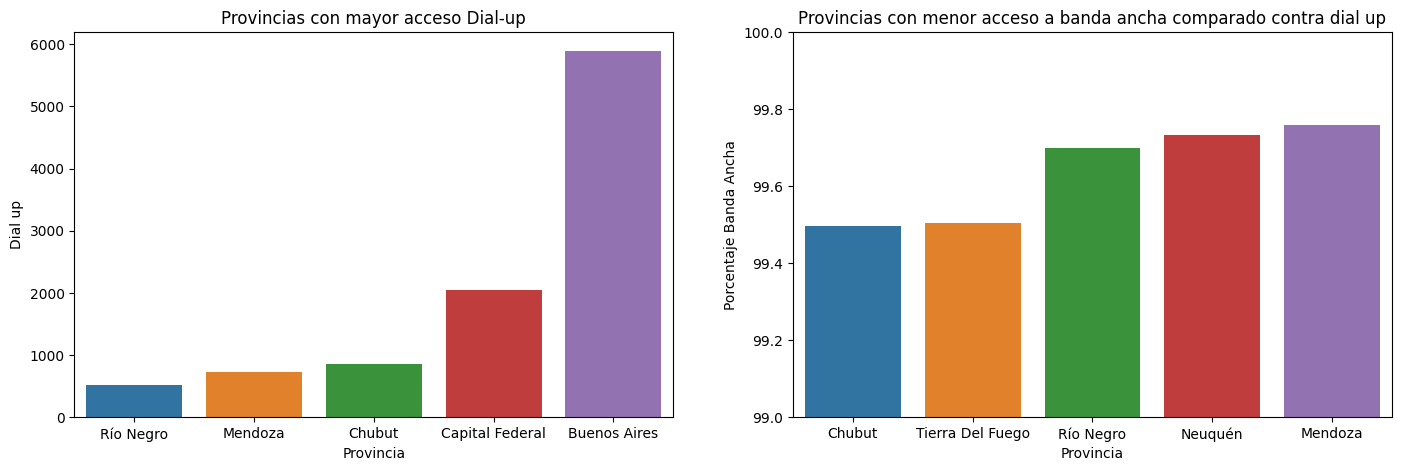

In [337]:
actual = dial[dial['Año'] == 2024]

actual_d = actual.sort_values(by='Dial up')
actual_d = actual_d.tail(5)

actual_b = actual.copy()
actual_b.loc[:, 'Porcentaje Banda Ancha'] = actual_b['Banda ancha fija'] / (actual_b['Banda ancha fija'] + actual_b['Dial up']) * 100
banda = actual_b.sort_values(by='Porcentaje Banda Ancha')
banda = banda.head(5)


# Crear el gráfico de líneas
fig, ax = plt.subplots(1,2, figsize=(17,5))

sns.barplot(data=actual_d, x='Provincia', y='Dial up', hue='Provincia', ax=ax[0])
ax[0].set_title('Provincias con mayor acceso Dial-up', fontsize=12)

sns.barplot(data=banda, x='Provincia', y='Porcentaje Banda Ancha',hue='Provincia', ax=ax[1])
ax[1].set_title('Provincias con menor acceso a banda ancha comparado contra dial up', fontsize=12)
ax[1].set_ylim(99, 100)

plt.show()


### Conclusiones de accesos por provncias

- **Acceso Dial-up**: El hecho de que Buenos Aires, a pesar de su liderazgo en tecnologías más avanzadas como **Cablemodem** y **Fibra óptica**, aún mantenga un volumen significativo de usuarios de **Dial-up**, sugiere la persistencia de áreas rurales o sectores que no han realizado la transición tecnológica completa. Esto podría ser un indicador de oportunidades estratégicas para ampliar la infraestructura de banda ancha en zonas donde la modernización aún no ha penetrado, especialmente considerando el contraste con provincias menos desarrolladas tecnológicamente como Chubut y Mendoza. 

- **Acceso a Banda Ancha**: A pesar de los altos porcentajes de acceso a Banda Ancha Fija en las provincias. En el Sur Argentino, sigue habiendo oportunidades clave para mejorar la infraestructura en áreas rurales. Invertir en **fibra óptica** y tecnologías inalámbricas en estas zonas puede optimizar la conectividad.

ya vimos los accesos por provincias. Ahora vemos por hogares.

In [338]:
ph = pd.read_csv('../data/crudo/p_hogar.csv')

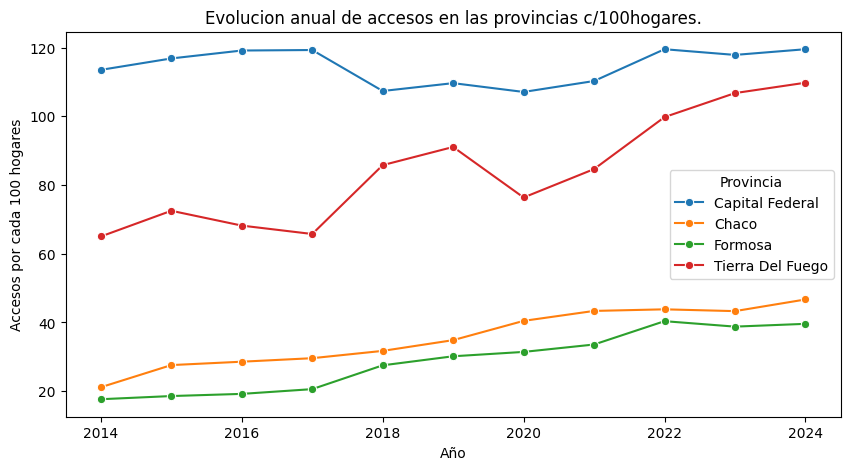

In [339]:
provincias_destacadas = ['Capital Federal', 'Tierra Del Fuego', 'Chaco', 'Formosa']
ph_destacado =ph[ph['Provincia'].isin(provincias_destacadas)]
# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=ph_destacado, x='Año', y='Accesos por cada 100 hogares', hue='Provincia', marker='o', errorbar=None)
ax.set_title('Evolucion anual de accesos en las provincias c/100hogares.', fontsize=12)

plt.show()

### Conclusiones de Accesos por Hogar:

**Tierra del Fuego** y **Capital Federal** presentan una saturación en conectividad, lo que sugiere que cualquier expansión adicional en estas provincias podría tener un impacto limitado, Pero tambien podria sugerir que su saturacion es en tecnologias antiguas, con posibilidad de reemplazo.

Sin embargo, el crecimiento sostenido en **Chaco** y **Formosa**, aunque con baja conectividad actual, representa una **oportunidad significativa** para expandir la infraestructura y servicios de internet. Invertir en estas provincias dado su crecimiento progresivo podría ofrecer un mayor retorno, por su potencial de aumento a lo largo del tiempo.


Veamos la rentabilidad de las empresas de internet.

In [340]:
ingresos = pd.read_csv('../data/crudo/ingresos.csv')
ingresos['Nivel general'] = ingresos['Nivel general'] / 100
ingresos['Factor_Ajuste'] = 1 + ingresos['Nivel general']
ingresos['Ingresos_Reales'] = ingresos['Ingresos (miles de pesos)'] / ingresos['Factor_Ajuste']

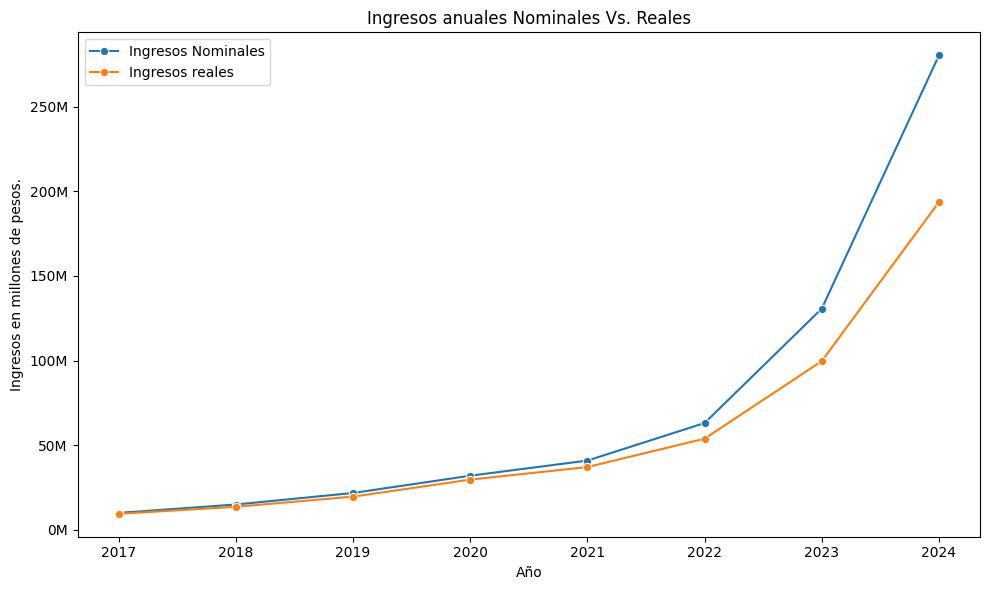

In [341]:
import matplotlib.ticker as ticker
# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=ingresos, x='Año', y='Ingresos (miles de pesos)', marker='o', label='Ingresos Nominales', errorbar=None, ax=ax)
sns.lineplot(data=ingresos, x='Año', y='Ingresos_Reales', marker='o', label='Ingresos reales', errorbar=None, ax=ax)
ax.set_title('Ingresos anuales Nominales Vs. Reales', fontsize=12)
ax.set_ylabel('Ingresos en millones de pesos.')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000)))

plt.legend()
plt.tight_layout()
plt.show()

### Conclusion de ingresos

Los ingresos nominales han crecido de manera constante, alcanzando hasta 250 millones de pesos en 2024. A pesar del ajuste por inflación, los ingresos reales siguen en aumento, indicando un crecimiento robusto en el sector.

**Después del Ajuste por Inflación:**
Los ingresos reales siguen mostrando una tendencia de crecimiento, aunque el ritmo se ha moderado. Los ingresos reales están por debajo de 200 millones de pesos, reflejando el impacto de la inflación pero aún manteniendo una trayectoria ascendente.